In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from get_financial_data import get_ticker_data

plt.rcParams['figure.dpi'] = 200

In [2]:
eth = get_ticker_data('eth-usd')
eth['time'] = eth['date'].apply(lambda x: x.value)

Shape of DataFrame:  (1574, 7)


In [3]:
btc = get_ticker_data('btc-usd')
btc['time'] = btc['date'].apply(lambda x: x.value)
btc.drop(inplace=True, index=np.where(btc['date']<eth['date'][eth.index[0]])[0])
btc.reset_index(inplace=True)
btc.drop(inplace=True, index=np.where(btc['date']>eth['date'][eth.index[-1]])[0])

Shape of DataFrame:  (2603, 7)


In [4]:
trends = pd.read_csv('trends.csv')
trends['date'] = pd.to_datetime(trends['Week'])

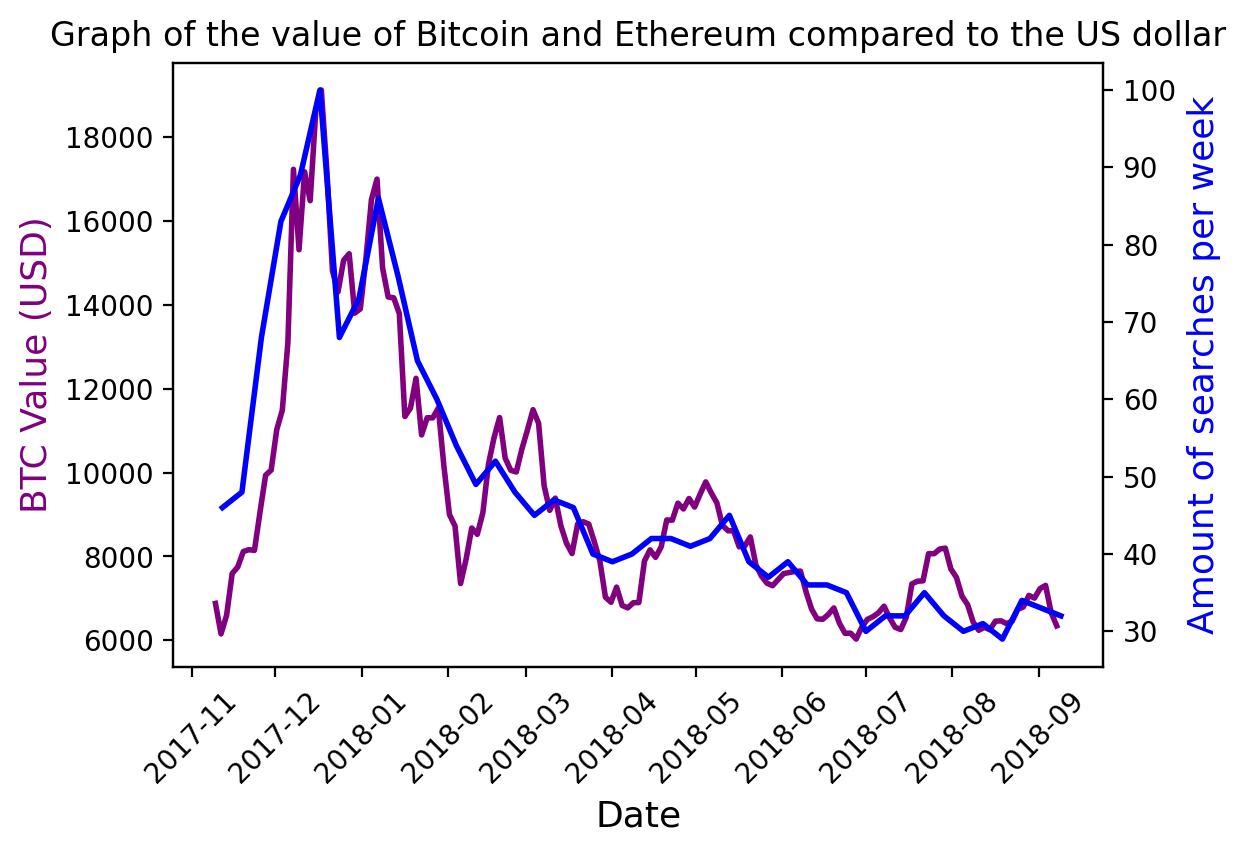

In [5]:
fig,ax=plt.subplots(dpi=200)
ax.set_title('Graph of the value of Bitcoin and Ethereum compared to the US dollar')
ax.set_xlabel('Date', fontsize=13)
ax.tick_params(axis='x', labelrotation=45)
ax2=ax.twinx()

f = btc.groupby(np.arange(len(btc))//2).mean()
f['date'] = pd.to_datetime(f['time'])
f.drop(inplace=True, index=np.where(f['date']<trends['date'][trends.index[0]])[0])
f.reset_index(inplace=True)
f.drop(inplace=True, index=np.where(f['date']>trends['date'][trends.index[-1]])[0])
ax.plot(f['date'], f['close'], color='purple', linewidth=2)
ax.set_ylabel("BTC Value (USD)", color='purple', fontsize=13)

f = trends
f.drop(inplace=True, index=np.where(f['date']<btc['date'][btc.index[0]])[0])
f.reset_index(inplace=True)
f.drop(inplace=True, index=np.where(f['date']>btc['date'][btc.index[-1]])[0])
ax2.plot(f['date'], f['blockchain'], color='blue', linewidth=2)
ax2.set_ylabel("Amount of searches per week", color='blue', fontsize=13)

plt.show()

[]

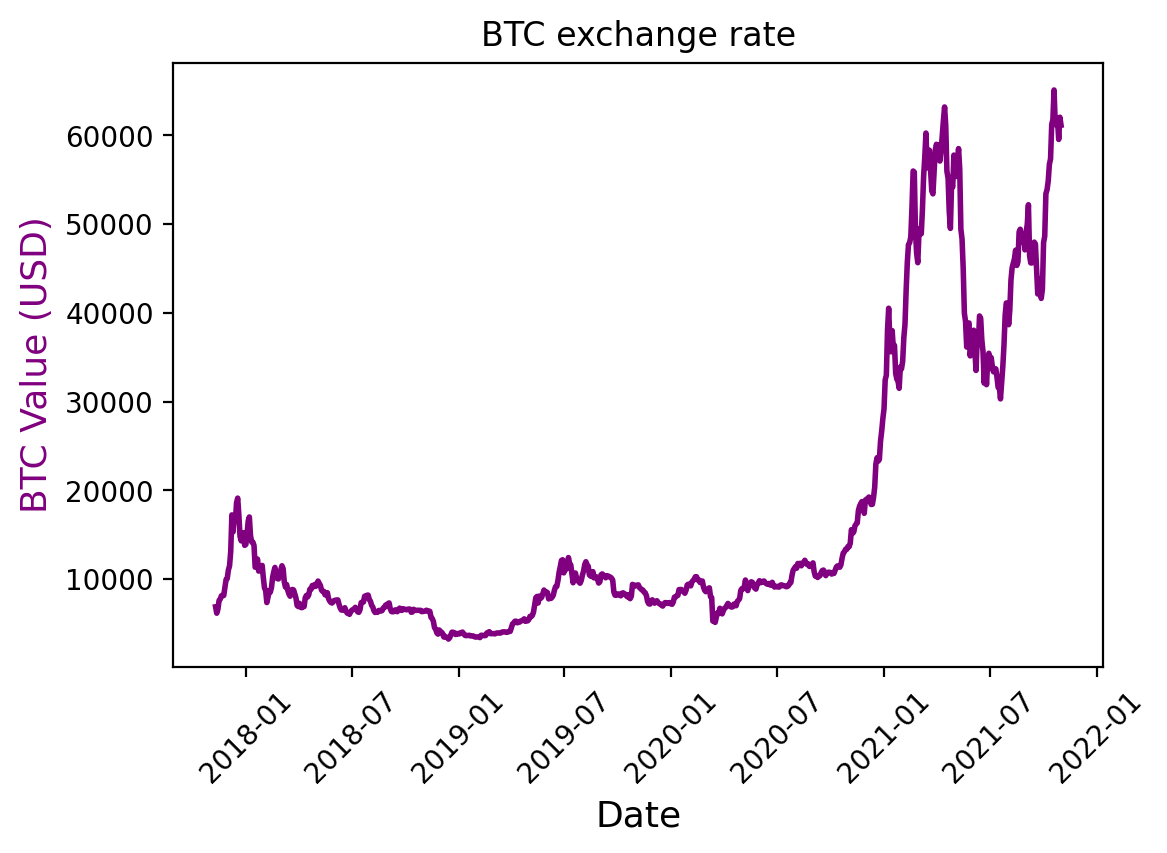

In [6]:
fig,ax=plt.subplots(dpi=200)
ax.set_title('BTC exchange rate')
ax.set_xlabel('Date', fontsize=13)
ax.tick_params(axis='x', labelrotation=45)

f = btc.groupby(np.arange(len(btc))//2).mean()
f['date'] = pd.to_datetime(f['time'])
ax.plot(f['date'], f['close'], color='purple', linewidth=2)
ax.set_ylabel("BTC Value (USD)", color='purple', fontsize=13)
plt.plot()

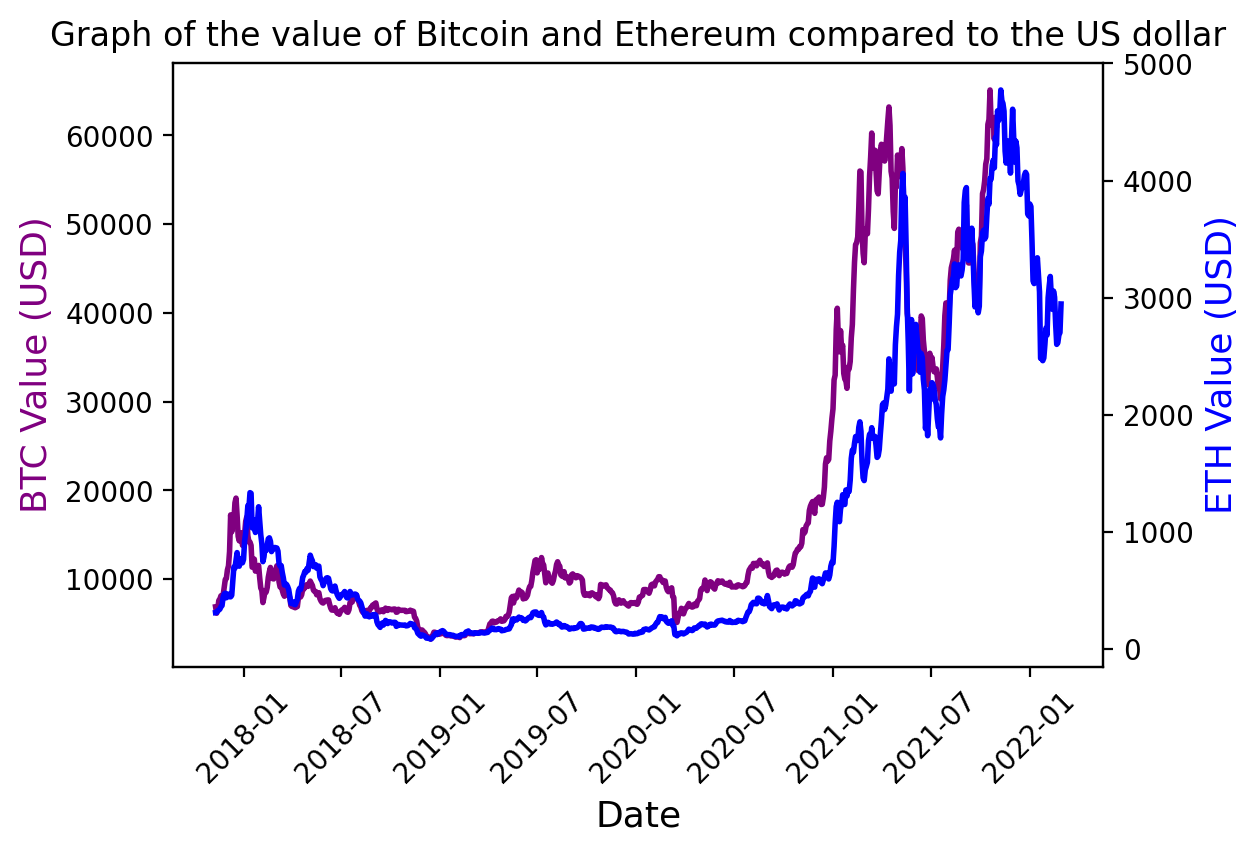

In [7]:
fig,ax=plt.subplots(dpi=200)
ax.set_title('Graph of the value of Bitcoin and Ethereum compared to the US dollar')
ax.set_xlabel('Date', fontsize=13)
ax.tick_params(axis='x', labelrotation=45)
ax2=ax.twinx()

f = btc.groupby(np.arange(len(btc))//2).mean()
f['date'] = pd.to_datetime(f['time'])
ax.plot(f['date'], f['close'], color='purple', linewidth=2)
ax.set_ylabel("BTC Value (USD)", color='purple', fontsize=13)

f = eth.groupby(np.arange(len(eth))//2).mean()
f['date'] = pd.to_datetime(f['time'])
ax2.plot(f['date'], f['close'], color='blue', linewidth=2)
ax2.set_ylabel("ETH Value (USD)", color='blue', fontsize=13)

plt.show()

Shape of DataFrame:  (1571, 7)


Text(0, 0.5, 'Price of 1 ETH (in BTC)')

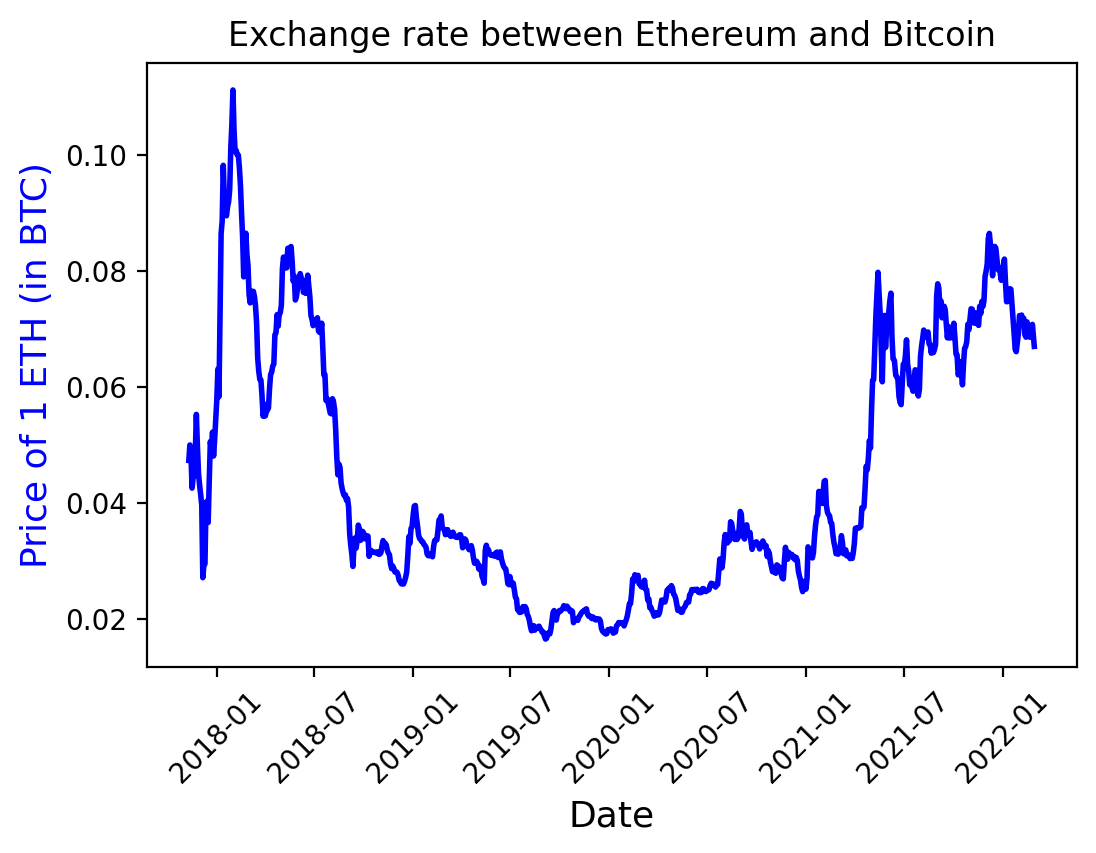

In [8]:
combo = get_ticker_data('eth-btc')
combo['time'] = combo['date'].apply(lambda x: x.value)

fig,ax=plt.subplots(dpi=200)
ax.set_title('Exchange rate between Ethereum and Bitcoin')
ax.set_xlabel('Date', fontsize=13)
ax.tick_params(axis='x', labelrotation=45)

f = combo.groupby(np.arange(len(combo))//2).mean()
f['date'] = pd.to_datetime(f['time'])
ax.plot(f['date'], f['close'], color='blue', linewidth=2)
ax.set_ylabel("Price of 1 ETH (in BTC)", color='blue', fontsize=13)